In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics

In [2]:
bom_blr_data = pd.read_csv('/Users/vidipghosh/Desktop/Machine Learning/FlightPricePrediction/DatasetMMT/flight_data_BOM_BLR.csv')
del_blr_data = pd.read_csv('/Users/vidipghosh/Desktop/Machine Learning/FlightPricePrediction/DatasetMMT/flight_data_DEL_BLR.csv')
del_bom_data = pd.read_csv('/Users/vidipghosh/Desktop/Machine Learning/FlightPricePrediction/DatasetMMT/flight_data_DEL_BOM.csv')
del_ccu_data = pd.read_csv('/Users/vidipghosh/Desktop/Machine Learning/FlightPricePrediction/DatasetMMT/flight_data_DEL_CCU.csv')
del_hyd_data = pd.read_csv('/Users/vidipghosh/Desktop/Machine Learning/FlightPricePrediction/DatasetMMT/flight_data_DEL_HYD.csv')

In [3]:
bom_blr_data

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,"2,307"
1,AirAsia,I5 670,Mumbai,19:55,Bengaluru,21:45,01 h 50 m,"2,773"
2,AirAsia,I5 2992,Mumbai,23:55,Bengaluru,01:45\r\n+ 1 DAY,01 h 50 m,"2,773"
3,IndiGo,6E 5388,Mumbai,21:30,Bengaluru,23:15,01 h 45 m,"2,839"
4,Akasa Air,QP 1103,Mumbai,00:45,Bengaluru,02:20,01 h 35 m,"3,005"
...,...,...,...,...,...,...,...,...
85,Vistara,UK 840,Bengaluru,21:35,Mumbai,23:20,01 h 45 m,"11,038"
86,Vistara,UK 850,Bengaluru,19:55,Mumbai,21:35,01 h 40 m,"11,934"
87,Vistara,UK 864,Bengaluru,19:00,Mumbai,20:35,01 h 35 m,"14,596"
88,Vistara,UK 864,Bengaluru,19:00,Mumbai,20:35,01 h 35 m,"14,596"


In [4]:
bom_blr_data.shape

(90, 8)

In [5]:
bom_blr_data.describe()

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
count,90,90,90,90,90,90,90,90
unique,5,70,2,58,2,61,9,53
top,IndiGo,6E 5124,Bengaluru,09:20,Mumbai,11:35,01 h 50 m,"3,005"
freq,39,3,46,3,46,3,21,5


In [6]:
bom_blr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FlightName     90 non-null     object
 1   FlightCode     90 non-null     object
 2   DepartingCity  90 non-null     object
 3   DepartingTime  90 non-null     object
 4   ArrivingCity   90 non-null     object
 5   ArrivingTime   90 non-null     object
 6   Duration       90 non-null     object
 7   Price          90 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


In [7]:
bom_blr_data["Price"] = bom_blr_data["Price"].str.replace(",", "")
del_blr_data["Price"] = del_blr_data["Price"].str.replace(",", "")
del_bom_data["Price"] = del_bom_data["Price"].str.replace(",", "")
del_ccu_data["Price"] = del_ccu_data["Price"].str.replace(",", "")
del_hyd_data["Price"] = del_hyd_data["Price"].str.replace(",", "")

In [8]:
bom_blr_data = bom_blr_data.astype({"Price":int})
del_blr_data = del_blr_data.astype({"Price":int})
del_bom_data = del_bom_data.astype({"Price":int})
del_ccu_data = del_ccu_data.astype({"Price":int})
del_hyd_data = del_hyd_data.astype({"Price":int})

In [9]:
del_blr_data

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Akasa Air,QP 1409,New Delhi,23:00,Bengaluru,01:45\n+ 1 DAY,02 h 45 m,5230
1,AirAsia,I5 740,New Delhi,07:50,Bengaluru,10:40,02 h 50 m,5235
2,AirAsia,I5 1534,New Delhi,22:55,Bengaluru,01:35\n+ 1 DAY,02 h 40 m,5235
3,IndiGo,6E 2067,New Delhi,03:55,Bengaluru,06:45,02 h 50 m,5236
4,IndiGo,6E 6612,New Delhi,05:50,Bengaluru,08:35,02 h 45 m,5236
...,...,...,...,...,...,...,...,...
90,Air India,AI 808,Bengaluru,21:00,New Delhi,23:55,02 h 55 m,10711
91,Vistara,UK 816,Bengaluru,11:30,New Delhi,14:10,02 h 40 m,10774
92,Vistara,UK 816,Bengaluru,11:30,New Delhi,14:10,02 h 40 m,10774
93,IndiGo,6E 2339,Bengaluru,00:30,New Delhi,03:20,02 h 50 m,12445


In [10]:
bom_blr_data["DepartingHour"] = bom_blr_data["DepartingTime"].str.split(":").str[0]
del_blr_data["DepartingHour"] = del_blr_data["DepartingTime"].str.split(":").str[0]
del_bom_data["DepartingHour"] = del_bom_data["DepartingTime"].str.split(":").str[0]
del_ccu_data["DepartingHour"] = del_ccu_data["DepartingTime"].str.split(":").str[0]
del_hyd_data["DepartingHour"] = del_hyd_data["DepartingTime"].str.split(":").str[0]

In [11]:
bom_blr_data = bom_blr_data.astype({"DepartingHour" : int})
del_blr_data = del_blr_data.astype({"DepartingHour" : int})
del_bom_data = del_bom_data.astype({"DepartingHour" : int})
del_ccu_data = del_ccu_data.astype({"DepartingHour" : int})
del_hyd_data = del_hyd_data.astype({"DepartingHour" : int})

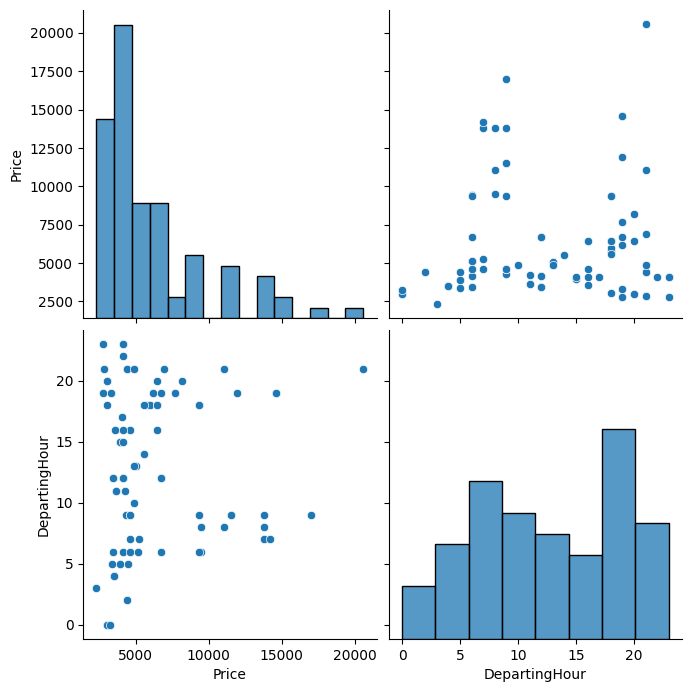

In [12]:
sns.pairplot(bom_blr_data, kind='scatter', height=3.5)


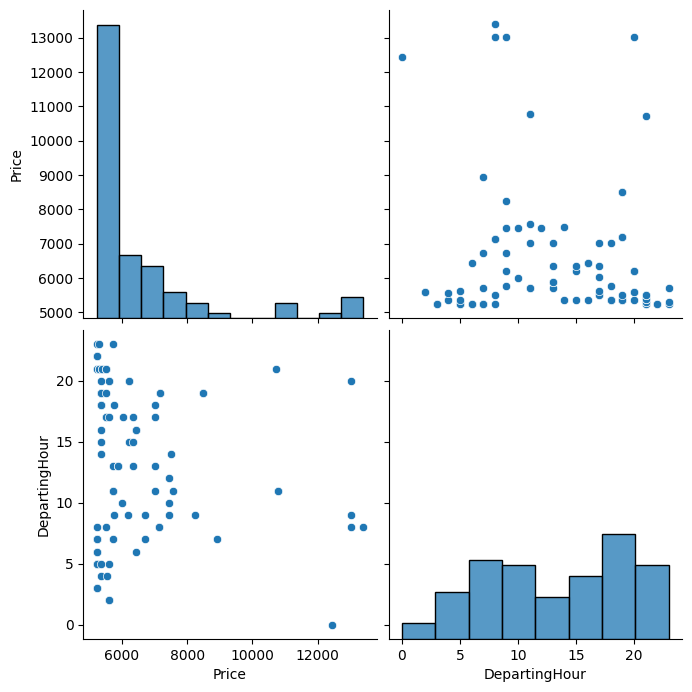

In [13]:
sns.pairplot(del_blr_data, kind='scatter', height=3.5)


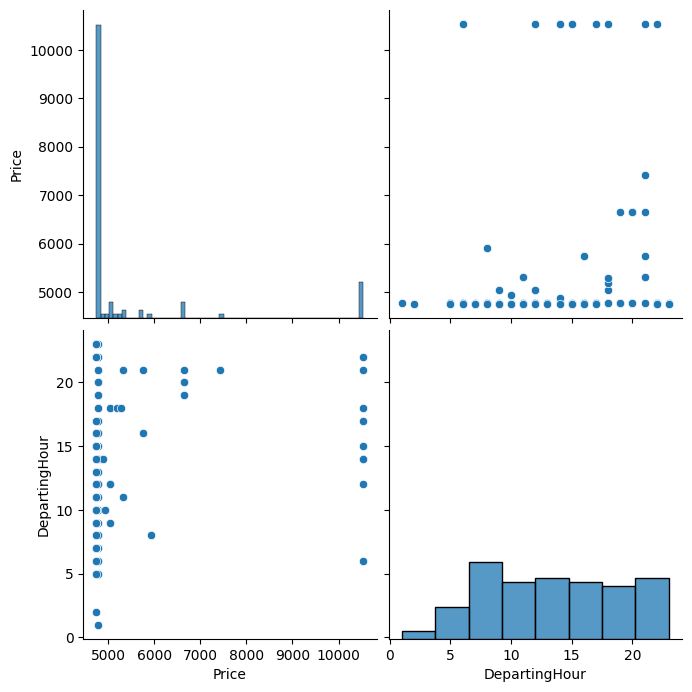

In [14]:
sns.pairplot(del_bom_data, kind='scatter', height=3.5)


Text(0.5, 1.0, 'DepartingHour vs Price')

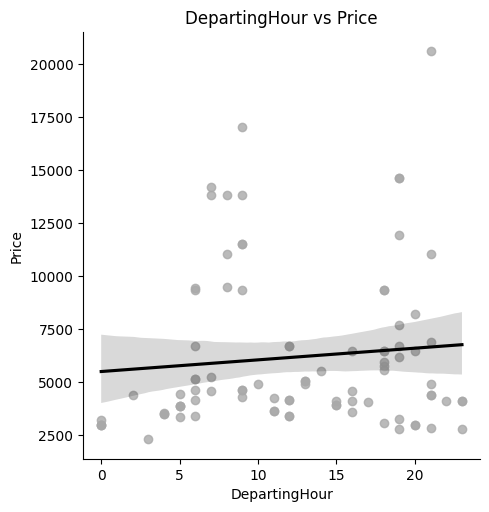

In [15]:
sns.lmplot(bom_blr_data, x='DepartingHour', y='Price', line_kws = {'color':'black'}, scatter_kws = {'color':'darkgrey'})
plt.title('DepartingHour vs Price')

Text(0.5, 1.0, 'DepartingHour vs Price')

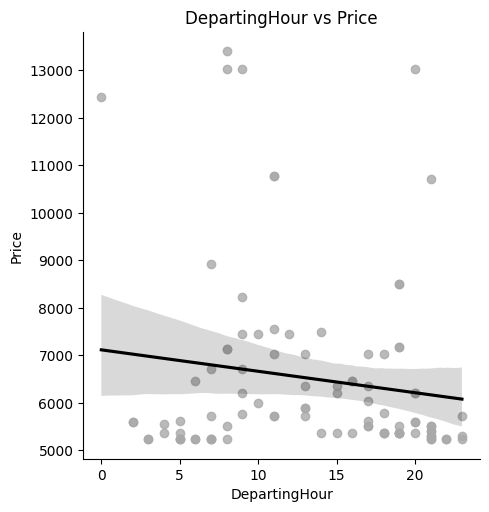

In [16]:
sns.lmplot(del_blr_data, x='DepartingHour', y='Price', line_kws = {'color':'black'}, scatter_kws = {'color':'darkgrey'})
plt.title('DepartingHour vs Price')


Text(0.5, 1.0, 'DepartingHour vs Price')

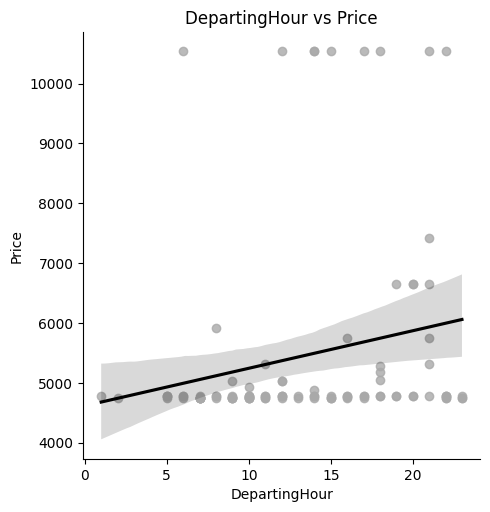

In [17]:
sns.lmplot(del_bom_data, x='DepartingHour', y='Price', line_kws = {'color':'black'}, scatter_kws = {'color':'darkgrey'})
plt.title('DepartingHour vs Price')

In [18]:
## Polynomial regression
bom_blr_x = bom_blr_data['DepartingHour'] #Outcome
bom_blr_y = bom_blr_data['Price'] #Prediction

model = np.poly1d(np.polyfit(bom_blr_x, bom_blr_y, 3))
line = np.linspace(1, 30, 90)


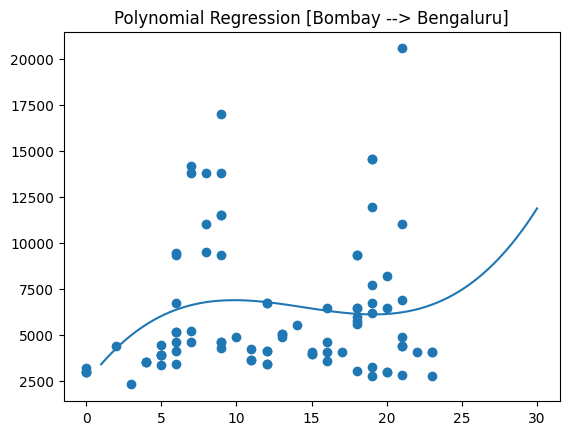

In [19]:
plt.scatter(bom_blr_x, bom_blr_y)
plt.plot(line, model(line))
plt.title('Polynomial Regression [Bombay --> Bengaluru]')
plt.show()


In [20]:
del_blr_x = del_blr_data['DepartingHour']
del_blr_y = del_blr_data['Price']

model = np.poly1d(np.polyfit(del_blr_x, del_blr_y, 3))
line = np.linspace(1, 30, 95)

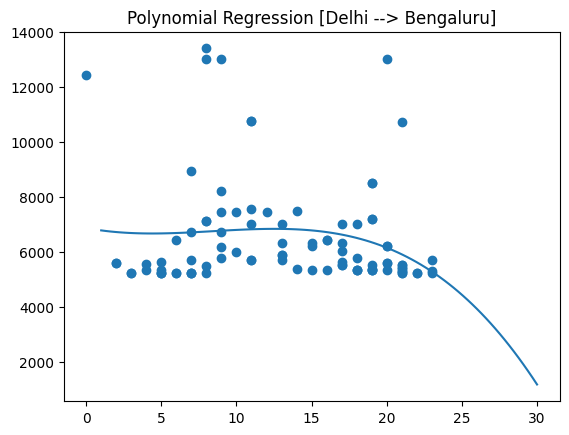

In [21]:
plt.scatter(del_blr_x, del_blr_y)
plt.plot(line, model(line))
plt.title('Polynomial Regression [Delhi --> Bengaluru]')
plt.show()

In [22]:
del_ccu_x = del_ccu_data['DepartingHour']
del_ccu_y = del_ccu_data['Price']

model = np.poly1d(np.polyfit(del_ccu_x, del_ccu_y, 3))
line = np.linspace(1, 30, 60)


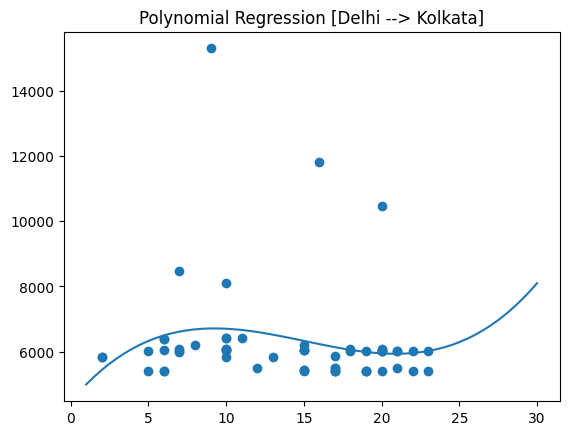

In [23]:
plt.scatter(del_ccu_x, del_ccu_y)
plt.plot(line, model(line))
plt.title('Polynomial Regression [Delhi --> Kolkata]')
plt.show()

In [24]:
bom_blr_data['DepartingTime']

0     03:55
1     19:55
2     23:55
3     21:30
4     00:45
      ...  
85    21:35
86    19:55
87    19:00
88    19:00
89    21:25
Name: DepartingTime, Length: 90, dtype: object

Text(0.5, 1.0, 'Barplot FlightName vs Avg. Price')

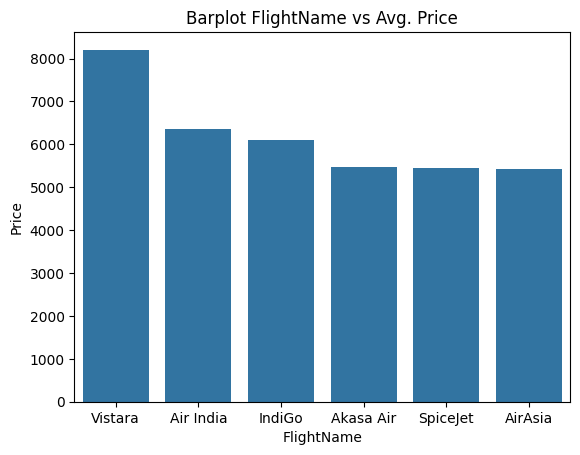

In [25]:
del_blr_data_avg_price = del_blr_data.groupby('FlightName')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
sns.barplot(x='FlightName', y='Price', data=del_blr_data_avg_price)
plt.title('Barplot FlightName vs Avg. Price')

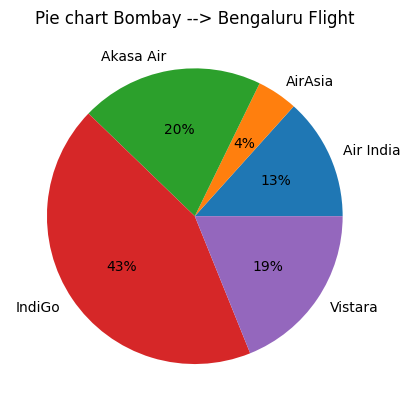

In [26]:
bom_blr_data.groupby("FlightName").size().plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Pie chart Bombay --> Bengaluru Flight')
plt.show()